In [24]:
 ## Hva observerer vi etter innføringen av bompenger i Tromsø, og hvilke effekter har dette på bilistenes atferd og velferd på kort og lang sikt?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/eskilaglen/1006/main/Mappe2/1006data.csv', sep=';', encoding='latin1', dtype={'Felt': object})

df


,Trafikkregistreringspunkt,Navn,Vegreferanse,Fra,Til,Dato,Felt,Trafikkmengde,Dekningsgrad (%),Antall timer total,...,Ikke gyldig lengde,Lengdekvalitetsgrad (%),"< 5,6m",">= 5,6m","5,6m - 7,6m","7,6m - 12,5m","12,5m - 16,0m",">= 16,0m","16,0m - 24,0m",">= 24,0m"
0,01057V1109432,Hansine Hansens veg,KV12650 S2D1 m20,2022-01-01T00:00+01:00,2022-01-02T00:00+01:00,2022-01-01,1,314,"100,0",24,...,0,"100,00",206,108,7,12,84,5,5,0
1,01057V1109432,Hansine Hansens veg,KV12650 S2D1 m20,2022-01-01T00:00+01:00,2022-01-02T00:00+01:00,2022-01-01,2,327,"100,0",24,...,2,"99,39",204,121,11,23,81,6,6,0
2,01057V1109432,Hansine Hansens veg,KV12650 S2D1 m20,2022-01-01T00:00+01:00,2022-01-02T00:00+01:00,2022-01-01,Totalt i retning Planetariet,314,"100,0",24,...,0,"100,00",206,108,7,12,84,5,5,0
3,01057V1109432,Hansine Hansens veg,KV12650 S2D1 m20,2022-01-01T00:00+01:00,2022-01-02T00:00+01:00,2022-01-01,Totalt i retning UNN,327,"100,0",24,...,2,"99,39",204,121,11,23,81,6,6,0
4,01057V1109432,Hansine Hansens veg,KV12650 S2D1 m20,2022-01-01T00:00+01:00,2022-01-02T00:00+01:00,2022-01-01,Totalt,641,"100,0",24,...,2,"99,69",410,229,18,35,165,11,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49471,82998V1125914,Tromsøbrua avkjøring,FV862 S1D1 m1780,2023-05-22T00:00+02:00,2023-05-23T00:00+02:00,2023-05-22,1,2339,"45,8",24,...,14,"99,40",2138,187,74,61,26,26,26,0
49472,82998V1125914,Tromsøbrua avkjøring,FV862 S1D1 m1780,2023-05-22T00:00+02:00,2023-05-23T00:00+02:00,2023-05-22,2,1487,"45,8",24,...,144,"90,32",1053,290,92,65,86,47,38,9
49473,82998V1125914,Tromsøbrua avkjøring,FV862 S1D1 m1780,2023-05-22T00:00+02:00,2023-05-23T00:00+02:00,2023-05-22,Totalt i retning Tromsdalen,1483,"45,8",24,...,142,"90,42",1053,288,92,64,85,47,38,9
49474,82998V1125914,Tromsøbrua avkjøring,FV862 S1D1 m1780,2023-05-22T00:00+02:00,2023-05-23T00:00+02:00,2023-05-22,Totalt i retning Tromsøya,2343,"45,8",24,...,16,"99,32",2138,189,74,62,27,26,26,0


In [3]:
df = df.loc[(df['Felt'] == 'Totalt'), ['Dato', 'Trafikkmengde', 'Navn']]

In [88]:
df

,Dato,Trafikkmengde,Navn
4,2022-01-01,641,Hansine Hansens veg
9,2022-01-02,825,Hansine Hansens veg
14,2022-01-03,3254,Hansine Hansens veg
19,2022-01-04,3410,Hansine Hansens veg
24,2022-01-05,3486,Hansine Hansens veg
...,...,...,...
49455,2023-05-18,8138,Tromsøbrua avkjøring
49460,2023-05-19,10882,Tromsøbrua avkjøring
49465,2023-05-20,8955,Tromsøbrua avkjøring
49470,2023-05-21,9408,Tromsøbrua avkjøring


In [4]:
import pandas as pd


df['Trafikkmengde'] = pd.to_numeric(df['Trafikkmengde'], errors='coerce')


df['Dato'] = pd.to_datetime(df['Dato'])


gj_dag = df.groupby('Dato')['Trafikkmengde'].mean()


gj_dag = gj_dag.reset_index()


print(gj_dag)

          Dato  Trafikkmengde
0   2022-01-01    4921.222222
1   2022-01-02    5299.944444
2   2022-01-03   11519.277778
3   2022-01-04   11624.388889
4   2022-01-05   11776.944444
..         ...            ...
502 2023-05-18    5804.000000
503 2023-05-19   10287.437500
504 2023-05-20    7695.937500
505 2023-05-21    6313.375000
506 2023-05-22    3566.312500

[507 rows x 2 columns]


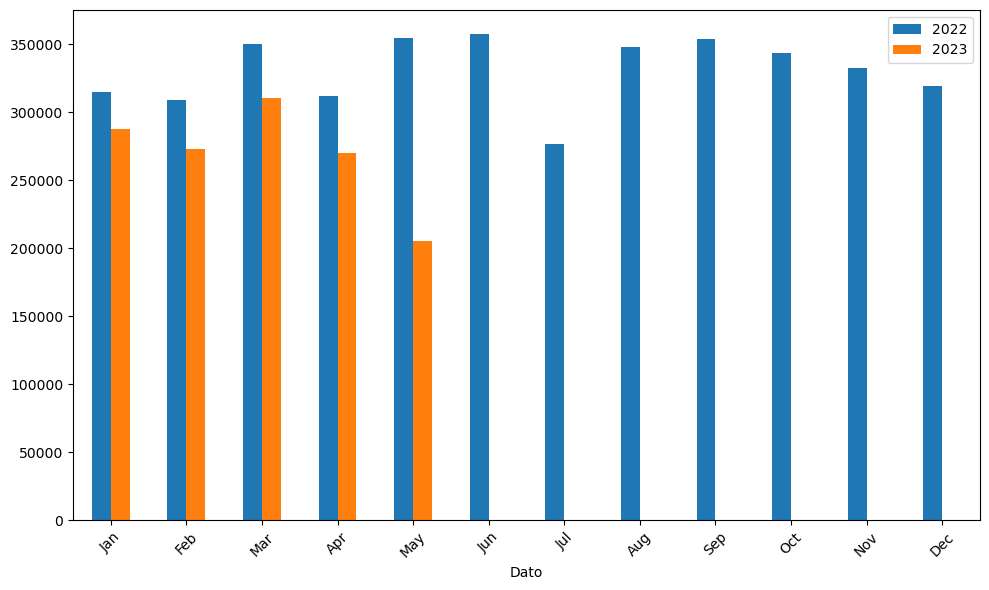

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

gj_dag['Dato'] = pd.to_datetime(gj_dag['Dato'])

df_2022 = gj_dag[gj_dag['Dato'].dt.year == 2022]
df_2023 = gj_dag[gj_dag['Dato'].dt.year == 2023]

grouped_2022 = df_2022.groupby(df_2022['Dato'].dt.strftime('%b'))['Trafikkmengde'].sum()
grouped_2023 = df_2023.groupby(df_2023['Dato'].dt.strftime('%b'))['Trafikkmengde'].sum()

df_stacked = pd.DataFrame({'2022': grouped_2022, '2023': grouped_2023})

df_stacked = df_stacked.reindex(pd.to_datetime(df_stacked.index, format='%b').sort_values().strftime('%b'))

df_stacked.plot(kind='bar', figsize=(10, 6))


plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
df['Dato'] = pd.to_datetime(df['Dato'])

df_måned = df.groupby(df['Dato'].dt.to_period('M'))['Trafikkmengde'].sum().reset_index()


df_måned.columns = ['Month', 'Total_Trafikkmengde']


print(df_måned)

      Month  Total_Trafikkmengde
0   2022-01              5672301
1   2022-02              5570939
2   2022-03              6305179
3   2022-04              5615374
4   2022-05              6386465
5   2022-06              6434449
6   2022-07              4978962
7   2022-08              6260234
8   2022-09              6366566
9   2022-10              6182699
10  2022-11              5994078
11  2022-12              5747044
12  2023-01              5182611
13  2023-02              4911747
14  2023-03              5589666
15  2023-04              4841390
16  2023-05              3342313


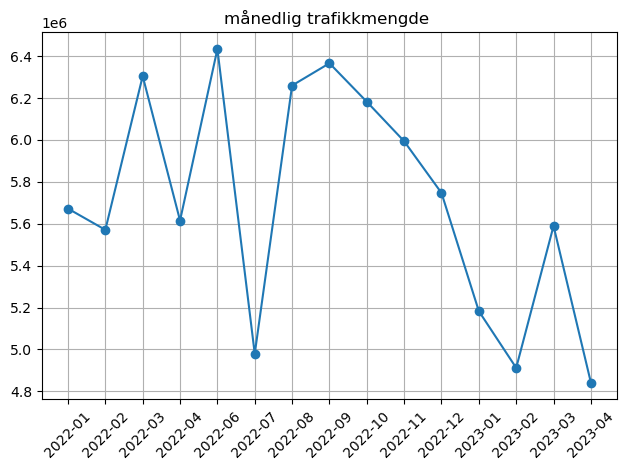

In [7]:
df_måned['Month'] = pd.PeriodIndex(df_måned['Month'], freq='M')

df_måned = df_måned[df_måned['Month'].map(lambda x: x.month != 5)]

df_måned = df_måned.sort_values('Month')

plt.plot(df_måned['Month'].astype(str), df_måned['Total_Trafikkmengde'], marker='o')
plt.title('månedlig trafikkmengde ')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
#fjerne mai?

In [8]:
# Konverter 'Month' kolonnen til datetime format
df_måned['Month'] = pd.to_datetime(df_måned['Month'], format='%Y-%m-%d')

# Filtrer data for de første tre ukene i 2022 og 2023
start_date_2022 = pd.to_datetime('2022-01-01')
end_date_2022 = pd.to_datetime('2022-01-21')
filtered_data_2022 = df_måned[(df_måned['Month'] >= start_date_2022) & (df_måned['Month'] <= end_date_2022)]

start_date_2023 = pd.to_datetime('2023-01-01')
end_date_2023 = pd.to_datetime('2023-01-21')
filtered_data_2023 = df_måned[(df_måned['Month'] >= start_date_2023) & (df_måned['Month'] <= end_date_2023)]

# Opprett en kombinert datasett for 2022 og 2023
combined_data = pd.concat([filtered_data_2022, filtered_data_2023], keys=['2022', '2023'])

# Pivoter datasettet for å forberede stacked barplot
pivot_data = combined_data.pivot(index='Month', columns=None, values='Trafikkmengde')

# Plot stacked barplot
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_title('Trafikkmengde - Første tre uker i 2022 og 2023')
ax.set_xlabel('Dato')
ax.set_ylabel('Trafikkmengde')

# Roter x-aksen tick-etiketter for bedre lesbarhet
plt.xticks(rotation=45)

# Vis plottet
plt.show()

TypeError: Passing PeriodDtype data is invalid. Use `data.to_timestamp()` instead

In [9]:
df_måned

,Month,Total_Trafikkmengde
0,2022-01,5672301
1,2022-02,5570939
2,2022-03,6305179
3,2022-04,5615374
5,2022-06,6434449
6,2022-07,4978962
7,2022-08,6260234
8,2022-09,6366566
9,2022-10,6182699
10,2022-11,5994078


In [143]:
#gj.rush vs gj.U rush? Før/etter - TIMEDATA
#forventer å finne samme endringer i trafikkmønster i tromsø VS andre byer m bompenger (eks bergen)
#selve trafikken før/etter
#alle eller bare 
#stone geary mby? flere variabler
#LEGG TIL NYTT DATASET - SYKKEL
#buss
#Stone Geary
#oppgave forelesning 13/14

In [ ]:
#oppgave 3 
#stone geary = 
# u = β1*ln(x1-gamma1)+β2ln(x2gamma2) hvor β1 + β2 = 1
#      

In [ ]:
#elastisiteter for biler 


β_1*log(x_1 - γ_1) + β_2*log(x_2 - γ_2)

0.013238974660301137
0.9867610253396989


In [58]:
import pandas as pd
df_buss = pd.read_csv("https://raw.githubusercontent.com/uit-sok-1006-v23/uit-sok-1006-v23.github.io/main/data/antall%20p%C3%A5stigende.csv", parse_dates=['date'], dayfirst=True)

In [54]:
df_buss

,Linje,Påstigende,date
0,20,1040,2022-01-01
1,24,839,2022-01-01
2,26,436,2022-01-01
3,28,1058,2022-01-01
4,33,531,2022-01-01
...,...,...,...
7507,28,2050,2023-04-30
7508,33,1628,2023-04-30
7509,34,1749,2023-04-30
7510,40,847,2023-04-30


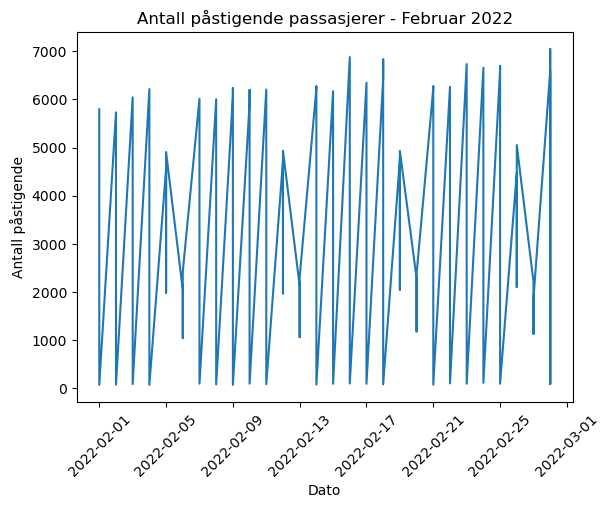

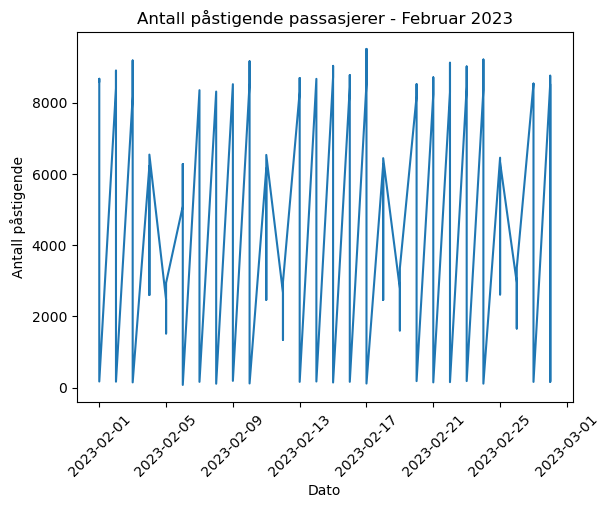

In [59]:
df_buss['date'] = pd.to_datetime(df_buss['date'])

# Filtrer data for februar 2022 og februar 2023
filtered_data_2022 = df_buss[(df_buss['date'].dt.year == 2022) & (df_buss['date'].dt.month == 2)]
filtered_data_2023 = df_buss[(df_buss['date'].dt.year == 2023) & (df_buss['date'].dt.month == 2)]

# Plot antall påstigende passasjerer for februar 2022
plt.plot(filtered_data_2022['date'], filtered_data_2022['Påstigende'])
plt.title('Antall påstigende passasjerer - Februar 2022')
plt.xlabel('Dato')
plt.ylabel('Antall påstigende')

# Roter x-aksen tick-etiketter for bedre lesbarhet
plt.xticks(rotation=45)

# Vis plottet
plt.show()

# Plot antall påstigende passasjerer for februar 2023
plt.plot(filtered_data_2023['date'], filtered_data_2023['Påstigende'])
plt.title('Antall påstigende passasjerer - Februar 2023')
plt.xlabel('Dato')
plt.ylabel('Antall påstigende')

# Roter x-aksen tick-etiketter for bedre lesbarhet
plt.xticks(rotation=45)

# Vis plottet
plt.show()







In [11]:
import sympy as sp

bta_1, bta_2, gma_1, gma_2 = sp.symbols('\u03B2_1 \u03B2_2 \u03B3_1 \u03B3_2', real=True, positive=True)
x1, x2, p1, p2, m = sp.symbols("x_1 x_2 p_1 p_2 m", real=True, positive=True)

sg = bta_1 * sp.ln(x1 - gma_1) + bta_2 * sp.ln(x2 - gma_2)

m=p1*x1+p2*x2

x_1 = 11.883 #definerer ut fra data fra https://www.motor.no/bensin-diesel-elbil/bensin--og-dieselbilene-vil-dominere-i-mange-ar/120510

sg

β_1*log(x_1 - γ_1) + β_2*log(x_2 - γ_2)

In [12]:
w1=p_1*x_1/m
w_f=(7436*3.03)/544600 #lager busjettbetingelse for EL, og for fossil
w_el=(7436*1.98)/544600
# bta_1 = w*elastisitet funnet i KVARST MODAG DOCUMENT
bta_1_f=w_f*0.32
bta_1_el=w_el*0.32
#finner beta 2, da b1+b2=1
bta_2_f=1-bta_1_f
bta_2_el=1-bta_1_el
print(bta_1_el)
print(bta_2_el)
print(bta_1_f)
print(bta_2_f)

0.00865121116415718
0.9913487888358428
0.013238974660301137
0.9867610253396989


In [13]:
#for å finne gamma2, Ordinær sats (lever sammen med ektefelle, partner eller samboer) = 277 454 i året, altså dette/12, delt på 2 grunnet 50/30/20 REGELEN
gma_2 = 270454/12/2
gma_2
x_2 = 664680/12/2 #bruker gjennomsnittlig inntekt for å finne x_2
p_1=3.03
p_2=1
m=p_1*x_1+p_2*x_2
print(x_2)
print(gma_2)
print(m)

27695.0
11268.916666666666
27731.00549


In [56]:
x1=11883 #gjennomsnittlig antall kilometer kjørt ssb?
x2 = 664680/12/2 #bruker gjennomsnittlig inntekt for å finne x_2
w1=p_1*x_1/m
w_1=(7436*3.03)/544600 #lager busjettbetingelse for EL, og for fossil
w_2=(7436*3.3)/544600
w_el=(7436*1.98)/544600
bta_1=w_1*0.32 # bta_1 = w*elastisitet funnet i KVARST MODAG DOCUMENT
bta_1_2=w_2*0.32
bta_2=1-bta_1 #finner beta 2, da b1+b2=1
bta_2_2=1-bta_1_2
gma2 = 270454/12/2 #for å finne gamma2, Ordinær sats (lever sammen med ektefelle, partner eller samboer) = 277 454 i året, altså dette/12, delt på 2 grunnet 50/30/20 REGELEN
gma1=3863 #regnestykke

print(bta_1)
print(bta_1_2)
print(bta_2)
print(bta_2_2)
print(x1)
print(x2)
print(gma1)
print(gma2)

0.013238974660301137
0.0144186852735953
0.9867610253396989
0.9855813147264048
11883
27695.0
3863
11268.916666666666


In [258]:
msb_sg=sp.diff(sg, x1)/sp.diff(sg,x2)

/usr/local/Miniconda3-py39_4.10.3-Linux-x86_64/lib/python3.9/site-packages/sympy/core/function.py:1238: SymPyDeprecationWarning: 

The string fallback in sympify() is deprecated.

To explicitly convert the string form of an object, use
sympify(str(obj)). To add define sympify behavior on custom
objects, use sympy.core.sympify.converter or define obj._sympy_
(see the sympify() docstring).

sympify() performed the string fallback resulting in the following string:

'<function sg at 0x7fb8f6f65af0>'

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-sympify-string-fallback
for details.

This has been deprecated since SymPy version 1.6. It
will be removed in a future version of SymPy.

  expr = sympify(expr)


SympifyError: Sympify of expression 'could not parse '<function sg at 0x7fb8f6f65af0>'' failed, because of exception being raised:
SyntaxError: invalid syntax (<string>, line 1)

In [33]:
#LAG EN STONE GEARY FOR FØR OG EN FOR ETTEr = ANNERLEDES P1


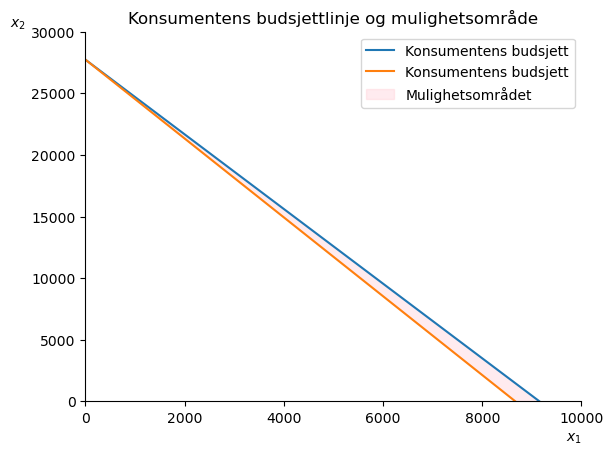

In [38]:
import matplotlib.pyplot as plt
import numpy as np
def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('$x_2$', loc='top', rotation=0)
                ax.set_xlabel('$x_1$', loc='right')
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                ax.set_xlim(0,10000)
                ax.set_ylim(0,30000)
                return fig, ax


x=np.linspace(1,10000, 100)

def budsjett(m, p_1, p_2, x_1):
    return (m-p_1*x_1/p_2)

fig, ax = create_ax()

ax.plot(x, budsjett(27731, 3.03, 1, x), label = 'Konsumentens budsjett')
ax.plot(x, budsjett(27731, 3.2, 1, x), label = 'Konsumentens budsjett')

ax.fill_between(x, budsjett(27731, 3.03, 1, x), budsjett(27731, 3.2, 1, x),color = "pink",alpha = 0.3,label='Mulighetsområdet')

ax.set_ylim(bottom=0)

ax.set_title('Konsumentens budsjettlinje og mulighetsområde')
ax.legend(loc='best');

In [48]:
sg

β_1*log(11883 - γ_1) + β_2*log(27695.0 - γ_2)

In [17]:
def nytte(bta_1,x_1,gma_1,bta_2,x_2,gma_2):
    return(bta_1*sp.log(x_1-gma_1)+bta_2*sp.log(x_2-gma_2))
nytte(bta_1_f,x_1,gma_1,bta_2_f,x_2,gma_2)

0.0132389746603011*log(11.883 - γ_1) + 9.57812002457439

In [18]:
import sympy as sp
sg = bta_1 * sp.ln(x_1 - gma_1) + bta_2 * sp.ln(x_2 - gma_2)
x_1, x_2, a, b, U_0, p_1, p_2 =sp.symbols("x_1 x_2 a b U_0 p_1 p_2", real=True, positive=True)
bta_1, bta_2, gma_1, gma_2 = sp.symbols('\u03B2_1 \u03B2_2 \gamma_1 \gamma_2', real=True, positive=True)
msb_sg=sp.diff(sg, x_1)/sp.diff(sg,x_2)
m=p_1*x_1+p_2*x_2

def budsjett(m, p1, p2, x1):
    return m/p2 - p1*x1/p2
budsjett(63700,3.03,1,11883)

27694.510000000002

In [257]:
# sett x_2 inn i (6) dvs budsjettet
# sett inn i m og løs for x_1
w_f=(7436*3.03)/544600
x_2_rel_sg= 664680/12/2
x_1_rel_sg= 11883
budsjett=m.subs(x_2,x_2_rel_sg)
display(budsjett)
x_1_sg_eq= sp.solve(w_f-m,x_1)[0]
x_2_sg_eq= x_1_rel_sg.subs(x_1,x_1_sg_eq)

# dette er likevektsløsning for x_1
#sett inn i x_2_rel_sg for å få x_2_eq


display(sp.simplify(x_1_sg_eq))
display(sp.simplify(x_2_sg_eq))

p_1*x_1 + 27695.0*p_2

AttributeError: 'int' object has no attribute 'subs'

In [82]:
sg

β_1*log(-\gamma_1 + x_1) + β_2*log(-\gamma_2 + x_2)

In [50]:

x1=11883/12 #gjennomsnittlig antall kilometer kjørt ssb?
x2 = 664680/12/2 #bruker gjennomsnittlig inntekt for å finne x_2
w_1=(7436*3.03)/544600 #lager busjettbetingelse for EL, og for fossil
w_2=(7436*1.98)/544600
bta1_f=w_1*0.32 # bta_1 = w*elastisitet funnet i KVARST MODAG DOCUMENT
bta1_el=w_2*0.32
bta2_f=1-bta1_f #finner beta 2, da b1+b2=1
bta2_el=1-bta1_el
gma2 = 270454/12/2 #for å finne gamma2, Ordinær sats (lever sammen med ektefelle, partner eller samboer) = 277 454 i året, altså dette/12, delt på 2 grunnet 50/30/20 REGELEN
gma1= 324 #regnestykke

print(bta1_f)
print(bta2_f)
print(x1)
print(x2)
print(gma1)
print(gma2)

0.013238974660301137
0.9867610253396989
990.25
27695.0
324
11268.916666666666


In [21]:
def sg(bta1,x1,gma1,bta2,x2,gma2):
    return bta1*sp.log(x1,gma1)+bta2*sp.log(x2+gma2)
sg(bta1_f,x1,gma1,bta2_f,x2,gma2)

0.0132389746603011*log(11883)/log(3863) + 10.430450140815

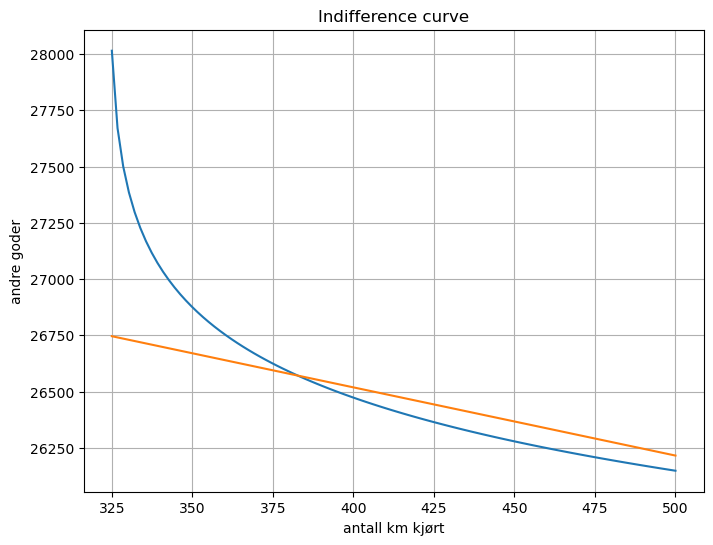

In [244]:
import matplotlib.pyplot as plt
import numpy as np
def budsjett(m, p_1, p_2, x_1):
    return (m-p_1*x_1/p_2)

bta_1 = (7476*3.03)/(664680/12/2)*0.32
bta_2 = 1 - bta_1
gma_1 = 324
gma_2 = (270454/12)/2
w_f=(7436*3.03)/544600
w_el=(7436*1.98)/(544600/12)
bta1_el=w_el*0.32
bta2_el=1-bta1_el

U = bta_1 * np.log(993 - gma_1) + bta_2 * np.log((664680/12)/2 - gma_2) 
U1 = bta_1_el * np.log(993 - gma_1) + bta_2_el * np.log((664680/12)/2 - gma_2) 

x_1_values = np.linspace(gma_1+1, 500, 100)
x=np.linspace(0.01,5000, 1000)


x_2_values = gma_2 * np.log((U - bta_1 * np.log(x_1_values - gma_1)) / bta_2)
x_2_el_values = gma_2 * np.log((U1 - bta_1_el * np.log(x_1_values - gma_1)) / bta_2_el)
plt.figure(figsize=(8,6))
plt.plot(x_1_values, x_2_values)
plt.plot(x_1_values, budsjett(27731, 3.03, 1, x_1_values), label = 'Konsumentens budsjett')
plt.xlabel('antall km kjørt')
plt.ylabel('andre goder')
plt.title('Indifference curve')
plt.grid(True)
plt.show()


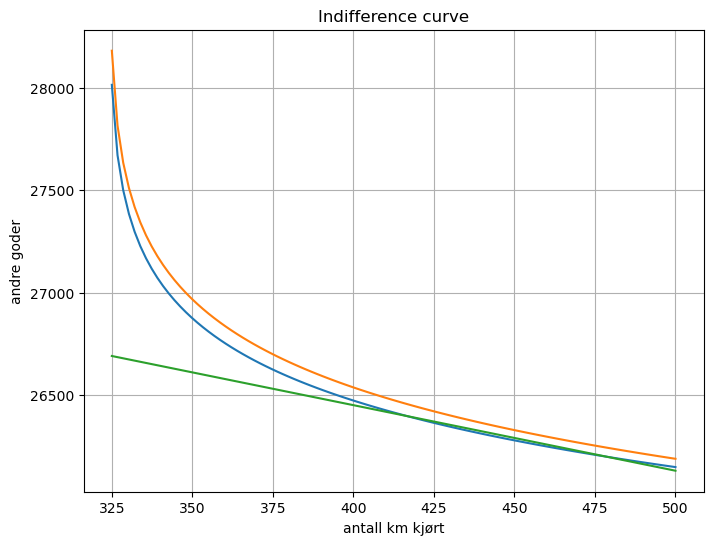

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def budsjett(m, p_1, p_2, x_1):
    return (m - p_1 * x_1 / p_2)

bta_1 = (7476 * 3.03) / (664680 / 12 / 2) * 0.32
bta_1_2 = (7476 * 3.20) / (664680 / 12 / 2) * 0.32
bta_2_1 = 1 - bta_1_2
bta_2 = 1 - bta_1
gma_1 = 324
gma_2 = (270454 / 12) / 2
w_el = (7436 * 1.98) / (544600 / 12)
bta1_el = w_el * 0.32
bta2_el = 1 - bta1_el

U_0 = bta_1 * np.log(993 - gma_1) + bta_2 * np.log((664680 / 12) / 2 - gma_2)

U_1 = bta_1_2 * np.log(993 - gma_1) + bta_2_1 * np.log((664680 / 12) / 2 - gma_2)

x_1_values = np.linspace(gma_1 + 1, 500, 100)
x = np.linspace(0.01, 5000, 1000)

x_1_2_values = gma_2 * np.log((U_0 - bta_1 * np.log(x_1_values - gma_1)) / bta_2)
x_2_2_values = gma_2 * np.log((U_1 - bta_1_2 * np.log(x_1_values - gma_1)) / bta_2_1)

plt.figure(figsize=(8, 6))
plt.plot(x_1_values, x_1_2_values)
plt.plot(x_1_values, x_2_2_values)
plt.plot(x_1_values, budsjett(27731, 3.2, 1, x_1_values), label = 'Konsumentens budsjett')
plt.xlabel('antall km kjørt')
plt.ylabel('andre goder')
plt.title('Indifference curve')
plt.grid(True)

# Set the desired zoom levels


plt.show()

In [253]:
print(bta_1)
print(bta_1_el)
print(bta_2)
print(bta_2_el)

0.2617342336161762
0.00865121116415718
0.7382657663838238
0.9913487888358428


In [298]:
bta_1, bta_2, gma_1, gma_2 = sp.symbols('\u03B2_1 \u03B2_2 \gamma_1 \gamma_2', real=True, positive=True)
x_1, x_2, p_1, p_2, m=sp.symbols("x_1 x_2 p_1 p_2 m", real=True, positive=True)

In [30]:
bta_1 = (7476 * 3.03) / 544600 * 0.32
bta_2 = 1 - bta_1
gma_1 = 324
gma_2 = (270454 / 12)/2
bta_1 = (7476 * 3.03) / (664680 / 12 / 2) * 0.32
bta_2 = 1 - bta_1
w_el = (7436 * 1.98) / (544600 / 12)
bta1_el = w_el * 0.32
bta2_el = 1 - bta1_el
x_1=11883/12 #gjennomsnittlig antall kilometer kjørt ssb?
x_2 = 664680/12/2 #bruker gjennomsnittlig inntekt for å finne x_2
w1=p_1*x_1/m

In [309]:
def budsjett(m, p_1, p_2, x_1):
    return (m - p_1 * x_1 / p_2)
budsjett(m, p_1, p_2, x_1)

m - 990.25*p_1/p_2

In [310]:
nytte_sg = bta_1 * sp.log(x_1 - gma_1) + bta_2 * sp.log(x_2 - gma_2)
nytte_sg

8.86777783301204

In [320]:
# beregn msb
x_1, x_2 = sp.symbols('x_1 x_2')
msb_sg=sp.diff(nytte_sg, x_1)/np.diff(nytte_sg,x_2)
msb_sg

TypeError: cannot determine truth value of Relational

In [4]:
# Bruk beta_1+beta_2=1
x_1_sg = sp.simplify(x_1_sg_eq.subs(bta_2,(1-bta_1)))
x_2_sg = sp.factor(x_2_sg_eq.subs(bta_1,(1-bta_2)))
display(x_1_sg)
display(x_2_sg)

(\gamma_1*(β_1 - 1) + 0.3125*\gamma_2*β_1 - 0.3125*x_2*β_1)/(2*β_1 - 1)

3.2*(1.0*β_2 - 1.0)*(1.0*\gamma_1*β_2 + 0.3125*\gamma_2*β_2 - 0.3125*\gamma_2 + 0.3125*x_2*β_2)/((β_2 - 1)*(2*β_2 - 1))

In [41]:
nytte_sg

β_1*log(-\gamma_1 + x_1) + (1 - β_1)*log(-\gamma_2 + x_2)

In [103]:
import numpy as np
m=p_1*x_1+p_2*x_2
p_1=3.2
p_2=1
x_1=11883/12 #gjennomsnittlig antall kilometer kjørt ssb?
x_2 = 664680/12/2 #bruker gjennomsnittlig inntekt for å finne x_2
w1=p_1*x_1/m
w_f=(7436*3.03)/544600 #lager busjettbetingelse for EL, og for fossil
w_el=(7436*1.98)/544600
bta_1=w_f*0.32 # bta_1 = w*elastisitet funnet i KVARST MODAG DOCUMENT
bta_2=1-bta1 #finner beta 2, da b1+b2=1
gma_2 = 270454/12/2 #for å finne gamma2, Ordinær sats (lever sammen med ektefelle, partner eller samboer) = 277 454 i året, altså dette/12, delt på 2 grunnet 50/30/20 REGELEN
gma_1= 324 #regnestykke

print(bta_1)
print(bta_2)
print(x_1)
print(x_2)
print(gma_1)
print(gma_2)
nytte_sg= 0.013238974660301137*np.exp(990.25-324)+bta2*np.exp(0.9867610253396989-11268.916666666666)
display(nytte_sg)

0.013238974660301137
0.9867610253396989
990.25
27695.0
324
11268.916666666666


2.9549689307120218e+287

In [3]:
x_1=11883 #gjennomsnittlig antall kilometer kjørt ssb?
x_2 = 664680/12/2 #bruker gjennomsnittlig inntekt for å finne x_2
w_1=(7436*3.03)/544600 #lager busjettbetingelse for før og etter bompenger (w_1 og w_2)
w_2=(7436*3.3)/544600
bta_1=w_1*0.32 # bta_1 = w*elastisitet funnet i KVARST MODAG DOCUMENT før / etter bompenger
bta_1_2=w_2*0.32
bta_2=1-bta_1 #finner beta 2, da b1+b2=1
bta_2_2=1-bta_1_2
gma_2 = 270454/12/2 #for å finne gamma2, Ordinær sats (lever sammen med ektefelle, partner eller samboer) = 277 454 i året, altså dette/12, delt på 2 grunnet 50/30/20 REGELEN
gma_1=3863 #regnestykke
p_1=3.03
p_1_2=3.3
gma_2 = 270454/12/2 #for å finne gamma2, Ordinær sats (lever sammen med ektefelle, partner eller samboer) = 277 454 i året, altså dette/12, delt på 2 grunnet 50/30/20 REGELEN
gma_1=3863 #regnestykke
p_1=3.03
p_1_2=3.3
p_2=1
m=p_1*x_1+p_2*x_2

print(bta_1)
print(bta_1_2)
print(bta_2)
print(bta_2_2)
print(x_1)
print(x_2)
print(gma_1)
print(gma_2)


bta_1_2=w_2*0.32
bta_2_2=1-bta_1_2
p_1_2=3.3

0.013238974660301137
0.0144186852735953
0.9867610253396989
0.9855813147264048
11883
27695.0
3863
11268.916666666666


In [1]:
#OPPGAVE 3

In [1]:
import sympy as sp

bta_1, bta_2, bta_1_2, bta_2_2, gma_1, gma_2 = sp.symbols('\u03B2_1 \u03B2_2 \u03B2_1_2 \u03B2_2_2 \u03B3_1 \u03B3_2', real=True, positive=True)
x_1, x_2, p_1, p_2,p_1_2, m = sp.symbols("x_1 x_2 p_1 p_2 p_1_2 m", real=True, positive=True)


In [2]:
w_1=(7436*3.03)/544600 #lager busjettbetingelse for før og etter bompenger (w_1 og w_2)
w_2=(7436*3.3)/544600


In [3]:
import sympy as sp

nytte_sg = bta_1*sp.log(x_1-gma_1) + (1-bta_1)*sp.log(x_2-gma_2)
nytte_sg1 = bta_1_2*sp.log(x_1-gma_1) + (1-bta_1_2)*sp.log(x_2-gma_2)
# steg 1
# vi har definert x_1_eq som etterspørsel etter gode 1

# gode 2 (se forelesning 13)

x_2_eq = gma_2 + (bta_2/p_2)*(m-p_1*gma_1-p_2*gma_2)
x_2_eq_2 = gma_2 + (bta_2_2/p_2)*(m-p_1_2*gma_1-p_2*gma_2)
# oppnåd nytte i likevekt
def budsjett(m, x_1, p_1, p_2):
    return m/p_2 - (p_1*x_1/p_2)
def budsjett2(m, x_1, p_1_2, p_2):
    return m/p_2 - (p_1_2*x_1/p_2)



x_1_eq = gma_1 + (bta_1/p_1)*(m-p_1*gma_1-p_2*gma_2)
x_1_eq_1 = gma_1 + (bta_1_2/p_1_2)*(m-p_1_2*gma_1-p_2*gma_2)
V = nytte_sg.subs([(x_1, x_1_eq), (x_2, x_2_eq)])
V
V1 = nytte_sg1.subs([(x_1, x_1_eq_1), (x_2, x_2_eq_2)])
V
print(x_1_eq)
print(x_1_eq_1)
print(V)
print(V1)

γ_1 + β_1*(m - p_1*γ_1 - p_2*γ_2)/p_1
γ_1 + β_1_2*(m - p_1_2*γ_1 - p_2*γ_2)/p_1_2
β_1*log(β_1*(m - p_1*γ_1 - p_2*γ_2)/p_1) + (1 - β_1)*log(β_2*(m - p_1*γ_1 - p_2*γ_2)/p_2)
β_1_2*log(β_1_2*(m - p_1_2*γ_1 - p_2*γ_2)/p_1_2) + (1 - β_1_2)*log(β_2_2*(m - p_1_2*γ_1 - p_2*γ_2)/p_2)


In [4]:
print(nytte_sg)
print(nytte_sg1)

β_1*log(x_1 - γ_1) + (1 - β_1)*log(x_2 - γ_2)
β_1_2*log(x_1 - γ_1) + (1 - β_1_2)*log(x_2 - γ_2)


In [5]:
x_2_eq = gma_2 + (bta_2/p_2)*(m-p_1*gma_1-p_2*gma_2)
x_2_eq_1 = gma_2 + (bta_2_2/p_2)*(m-p_1_2*gma_1-p_2*gma_2)
print(x_2_eq)
print(x_2_eq_1)

γ_2 + β_2*(m - p_1*γ_1 - p_2*γ_2)/p_2
γ_2 + β_2_2*(m - p_1_2*γ_1 - p_2*γ_2)/p_2


In [6]:
import sympy as sp
#lag funksjon for indifferenskurve
U_0=sp.symbols('U_0', real = True, positive=True)

ind_k = (nytte_sg-U_0, x_2)[0]
display(ind_k)

-U_0 + β_1*log(x_1 - γ_1) + (1 - β_1)*log(x_2 - γ_2)

In [7]:
# lag funksjon
def ind_k_fn(bta_1, gma_1, gma_2, x_1, U_0):
    x_1_positiv = np.maximum(x_1 - gma_1, 0.001) 
    return gma_2 + np.exp((bta_1 * np.log(x_1_positiv) - U_0) / (bta_1 - 1))

In [8]:
#etter bompenger
def ind_k_fn_2(bta_1_2, gma_1, gma_2, x_1, U_0):
    x_1_positiv = np.maximum(x_1 - gma_1, 0.001) 
    return gma_2 + np.exp((bta_1_2 * np.log(x_1_positiv) - U_0) / (bta_1_2 - 1))

In [9]:
x_1_eq_num = float(x_1_eq.subs([(bta_1, 0.013310190231362467), (gma_1, 324), (gma_2, 11200), (m, 27731), (p_1, 3.03), (p_2, 1)]))
x_2_eq_num = float(x_2_eq.subs([(bta_2, 0.9866898097686375), (gma_1, 324), (gma_2, 11200), (m, 27731), (p_1, 3.03), (p_2, 1)]))
nytte_sg_num = float(V.subs([(bta_1, 0.013310190231362467),(bta_2, 0.9866898097686375), (gma_1, 324), (gma_2, 11200), (m, 27731), (p_1, 3.03), (p_2, 1)]))
print(nytte_sg_num)

9.566303509812702


In [10]:
x_1_eq_num_1 = float(x_1_eq_1.subs([(bta_1_2, 0.0144186852735953), (gma_1, 324), (gma_2, 11200), (m, 27731), (p_1_2, 3.3), (p_2, 1)]))
x_2_eq_num_1 = float(x_2_eq_1.subs([(bta_2_2, 0.9855813147264048), (gma_1, 324), (gma_2, 11200), (m, 27731), (p_1_2, 3.3), (p_2, 1)]))
nytte_sg_num1 = float(V1.subs([(bta_1_2,0.0144186852735953),(bta_2_2, 0.9855813147264048), (gma_1, 324), (gma_2, 11200), (m, 27731), (p_1_2, 3.3), (p_2, 1)]))
print(nytte_sg_num1)

9.55347459189167


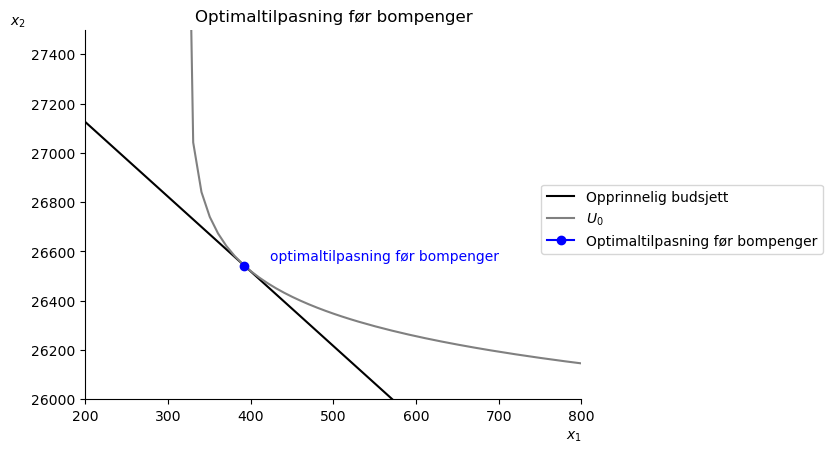

In [33]:
import numpy as np
import matplotlib.pyplot as plt
# lag X som sikrer x-gma>0
X = np.linspace (0.001,10000,1000)
def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('$x_2$', loc='top', rotation=0)
                ax.set_xlabel('$x_1$', loc='right')
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                ax.set_xlim(0,10000)
                ax.set_ylim(0,30000)
                return fig, ax
# 


fig1, ax = create_ax()
ax.set(xlim=(200,800))
ax.set(ylim=(26000,27500))

ax.set_ylabel('$x_2$', loc='top', rotation=0)

ax.plot(X, budsjett(27731, X, 3.03, 1), color='black', label='Opprinnelig budsjett')
ax.plot(X, ind_k_fn(0.013310190231362467,324,11200,X,nytte_sg_num), color='grey',label='$U_0$')
ax.plot(x_1_eq_num, x_2_eq_num, marker='o', color='blue', label='Optimaltilpasning før bompenger')
ax.text(700, 26550, 'optimaltilpasning før bompenger', 
        verticalalignment='bottom', horizontalalignment='right', color='blue')
# tittel
ax.set_title('Optimaltilpasning før bompenger')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));

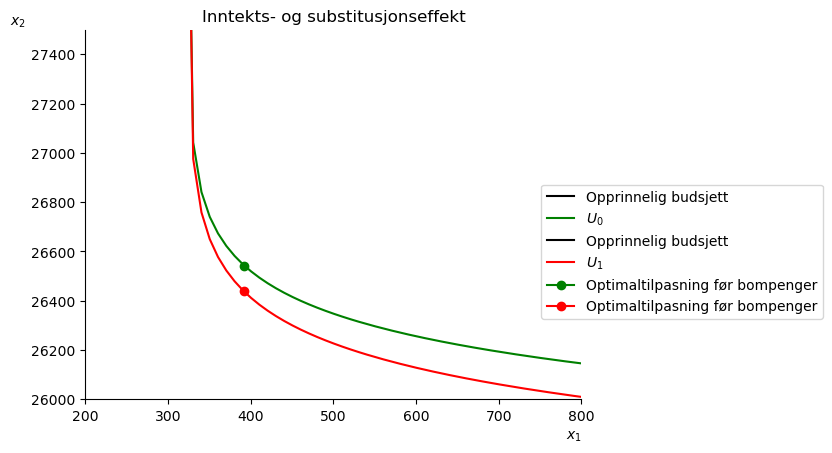

In [49]:


import numpy as np
import matplotlib.pyplot as plt
# lag X som sikrer x-gma>0
X = np.linspace (0.001,10000,1000)
def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('$x_2$', loc='top', rotation=0)
                ax.set_xlabel('$x_1$', loc='right')
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                ax.set_xlim(0,10000)
                ax.set_ylim(0,30000)
                return fig, ax
# 


fig1, ax = create_ax()
ax.set(xlim=(200,800))
ax.set(ylim=(26000,27500))

ax.set_ylabel('$x_2$', loc='top', rotation=0)

ax.plot(X, budsjett(27731/2, X, 3.03, 1), color='black', label='Opprinnelig budsjett')
ax.plot(X, ind_k_fn(0.013310190231362467,324,11200,X,nytte_sg_num), color='green',label='$U_0$')
ax.plot(X, budsjett2(27731/2, X, 3.3, 1), color='black', label='Opprinnelig budsjett')
ax.plot(X, ind_k_fn_2(0.0144186852735953,324,11200,X,nytte_sg_num1), color='red',label='$U_1$')

ax.plot(x_1_eq_num, x_2_eq_num, marker='o', color='green', label='Optimaltilpasning før bompenger')
ax.plot(x_1_eq_num_1, x_2_eq_num_1, marker='o', color='red', label='Optimaltilpasning før bompenger')
# tittel
ax.set_title('Inntekts- og substitusjonseffekt')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));